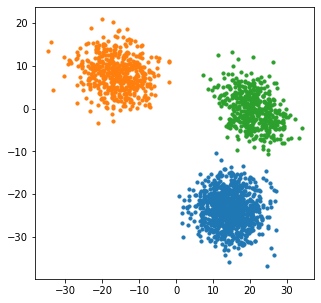

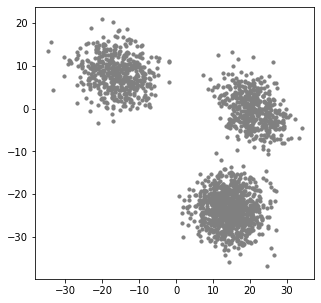

In [55]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)

# rotation
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

# translation
t1 = 50*(np.random.rand(1,2) - 0.5)
t2 = 50*(np.random.rand(1,2) - 0.5)
t3 = 50*(np.random.rand(1,2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

plt.figure(figsize = (5,5))
plt.scatter(X1[:,0],X1[:,1], s = 10)
plt.scatter(X2[:,0],X2[:,1], s = 10)
plt.scatter(X3[:,0],X3[:,1], s = 10)

X = np.vstack([X1, X2, X3])
np.random.shuffle(X)

plt.figure(figsize = (5,5))
plt.scatter(X[:,0],X[:,1],s = 10,color = "gray")

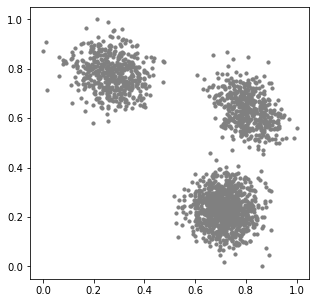

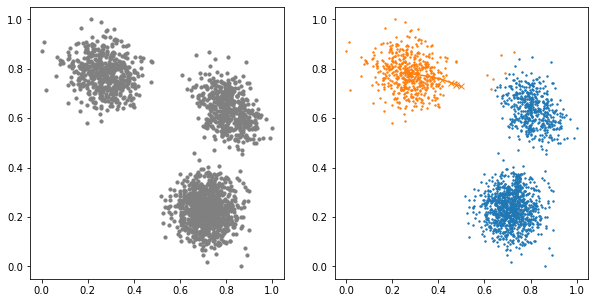

In [59]:
# parameter, 손댈 필요 
K = 2 # cluster의 개수
maxIter = 10 # 최대 몇번 iteration을 반복할건지

# normalization, [0, 1]
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

plt.figure(figsize = (5,5))
plt.scatter(X[:,0],X[:,1],s = 10,color = "gray")

# initialize, 손댈 필요 없음
# N: 샘플의 수, for n in range(N):
# D: 입력의 차원, for d in range(D):
# K: cluster의 개수, for k in range(K):
(N, D) = X.shape
mu_traj = np.zeros((K,D,maxIter)) # 3차원 array
dist = np.zeros((N,K))

# k-means 본론

# 0. mu를 랜덤으로 초기화
mu = np.random.rand(K,D) # uniform random, [0, 1] 사이에서 균일한 분포로 랜덤을 생성
mu_traj[:,:,0] = mu

for iter in range(0, maxIter):
    # 1. 전체 데이터에 대해서, 각각의 mu로부터 거리를 계산
    for k in range(0, K):
        dist[:,k] = np.sum((X - np.matlib.repmat(mu[k,:],N,1))**2, axis = 1)

    # 2. 계산한 거리로부터, 어떤 mu에 제일 가까운지 계산 (r을 계산)\
    label = np.argmin(dist, axis = 1)

    # 3. 각각의 mu에 제일 가깝다고 계산된 샘플들끼리 평균을 계산 => mu에 업데이트 (mu를 계산)
    for k in range(0, K):
        mu[k,:] = np.mean(X[label == k, :], axis = 0)
    mu_traj[:,:,iter] = mu

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s = 10,color = "gray")

plt.subplot(1,2,2)
for k in range(0,K):
    plt.scatter(X[label == k,0],X[label == k,1],s = 2)
plt.gca().set_prop_cycle(None) # 색상 로테이션을 초기화
for k in range(0,K):
#     plt.plot(mu[k,0],mu[k,1],marker = "x",markersize = 20)
    plt.plot(mu_traj[k,0,:],mu_traj[k,1,:],marker = "x")


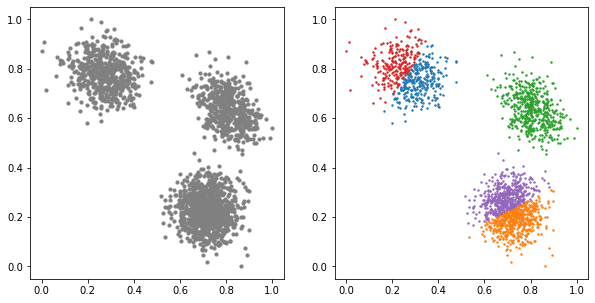

In [63]:
# 수업 전에 업로드한 코드, 오늘 다루지 못한 부분

# label => one-of-K coding 변환
# 우리가 짠 kmeans 알고리즘 => 함수로 변환
# 랜덤으로 생성한 데이터 말고, kaggle에 있는 데이터에 kmeans를 적용 (genfromtxt, csv파일 읽어오고)

from sklearn.cluster import KMeans

K = 5

model = KMeans(n_clusters = K)
model.fit(X)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s = 10,color = "gray")

plt.subplot(1,2,2)
for k in range(0,K):
    plt.scatter(X[model.labels_ == k,0],X[model.labels_ == k,1],s = 2)